In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step-01: Load the dataset

In [2]:
# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# theme: BAsed on age and estimated salary find purchased or not
# so remove or delete columns and give just age estimatedsalary and purchased
# input:x-age and estimatedSalary and output: y- purchased
# : start to end rows, 2:4 means 2 to 4 columns
# for input data
X = df.iloc[:,2:4].values
X.shape

(400, 2)

In [4]:
# set target varaible/Featur or colum
y = df.iloc[:,-1].values
y.shape

(400,)

### Step-02: Cross validation

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [6]:

X_train.shape

(320, 2)

In [7]:
y_train.shape

(320,)

### Step-03: StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler
# create object of SDS
scaler = StandardScaler()

In [9]:
# usning standrad scalar train x_train and transfrom x_test
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.03873889,  0.00354496],
       [-0.98503234, -0.34549738],
       [-1.45817907, -1.50897183],
       [-0.32262692, -0.7818003 ],
       [ 0.90755457, -1.45079811],
       [ 0.81292522,  0.11989241],
       [ 0.90755457, -1.04358205],
       [-0.79577365,  0.38167416],
       [ 0.81292522, -0.31641051],
       [ 0.05589046, -0.25823679],
       [ 0.24514915, -0.14188935],
       [-0.22799758, -0.75271343],
       [-0.98503234, -0.46184482],
       [ 0.33977849, -0.20006307],
       [-1.36354972, -1.21810322],
       [-0.60651496, -0.11280248],
       [-0.41725627,  1.25428   ],
       [-1.07966169,  0.29441357],
       [ 1.94847737, -1.36353752],
       [-0.03873889,  0.14897927],
       [-0.03873889, -0.22914993],
       [ 1.09681326,  2.06871212],
       [ 1.38070129,  0.58528219],
       [-1.74206711,  0.00354496],
       [ 0.24514915, -0.66545285],
       [ 1.00218391,  1.7778435 ],
       [-0.70114431,  0.29441357],
       [-1.07966169,  0.06171868],
       [ 1.66458933,

In [10]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.05589046, -0.57819227],
       [ 1.00218391,  0.75980336],
       [-0.22799758, -0.66545285],
       [ 0.43440784,  0.58528219],
       [-0.13336823, -0.28732365],
       [-0.98503234,  0.75980336],
       [ 0.24514915,  2.09779898],
       [ 1.00218391, -1.07266891],
       [-0.22799758,  0.14897927],
       [-1.07966169, -0.52001854],
       [-1.36354972,  0.3525873 ],
       [-0.60651496, -1.59623241],
       [-0.32262692,  1.31245372],
       [ 1.38070129, -1.42171125],
       [ 1.94847737, -0.9272346 ],
       [-0.22799758, -0.57819227],
       [-1.26892038, -1.24719008],
       [ 0.43440784, -0.14188935],
       [ 1.09681326,  0.55619533],
       [ 1.75921868,  0.99249825],
       [ 1.09681326, -0.14188935],
       [-0.22799758,  2.24323329],
       [ 2.13773606,  0.38167416],
       [-0.03873889,  0.29441357],
       [ 0.43440784,  1.10884569],
       [ 2.04310671,  0.52710847],
       [-0.22799758, -1.24719008],
       [ 0.33977849, -0.31641051],
       [ 0.1505198 ,

## KNN start from here

### method : k = sqrt(n)

In [14]:
np.sqrt(X_train.shape[0])


np.float64(17.88854381999832)

In [15]:
# Slect K=17
k=17

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# make knn object using k=17
knn = KNeighborsClassifier(n_neighbors=k)

In [19]:
# now using knn train our model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
# y_pred and y_test shape must be same
y_pred = knn.predict(X_test)
y_pred.shape

(80,)

In [21]:
# now check accuracy after uisng knn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [22]:
# use confusion matrics
'''
A confusion matrix represents the prediction summary in matrix form. 
It shows how many prediction are correct and incorrect per class. 
It helps in understanding the classes that are being confused by model as other class.
'''
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[46,  4],
       [ 4, 26]])

### Method: 02
without knowing k . first we create a loop for find best k value using knn algorithm

In [23]:
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit model
    knn.fit(X_train,y_train)
    # insert all values in accuracy list of y_test and x_test predicted values
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [24]:
accuracy

[0.8625,
 0.85,
 0.9,
 0.8875,
 0.9,
 0.8875,
 0.9125,
 0.8875,
 0.9,
 0.8875,
 0.8875,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.8875,
 0.875,
 0.8875,
 0.875,
 0.875,
 0.8875,
 0.8875]

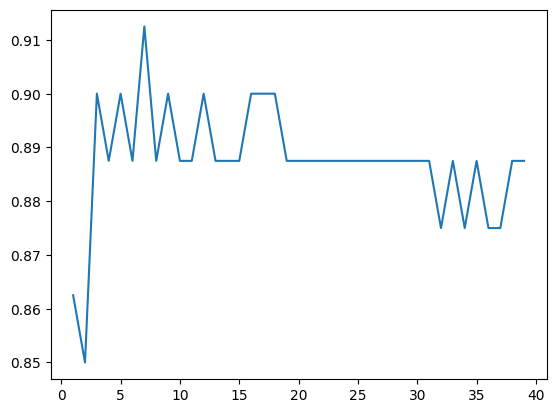

In [25]:
# now draw a plot to see wich k value gives us most accuracy
plt.plot(range(1,40),accuracy)

In [27]:
# here we see that 7 or 8 k value gives us heighest accuracy of this data
# now using k =7 or 8 lets check again
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
# now predict
y_pred = knn.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.9125